In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix_df=pd.read_csv('netflix daily top 10.csv')

In [3]:
netflix_df.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [4]:
tvshow=netflix_df[netflix_df['Type']=='TV Show']

In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [6]:
netflix_df.isna().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [7]:
netflix_df=netflix_df.drop(columns='Netflix Exclusive',axis=1)

In [8]:
netflix_df.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,"Mar 20, 2020",9,55


In [9]:
netflix_df['Last Week Rank']=netflix_df['Last Week Rank'].replace('-','5')

In [10]:
netflix_df['Last Week Rank']=netflix_df['Last Week Rank'].astype(int)

In [11]:
#netflix_df['Rank'].uniqueque()
netflix_df['Year to Date Rank']=netflix_df['Year to Date Rank'].replace('-','5')

In [12]:
netflix_df['Year to Date Rank']=netflix_df['Year to Date Rank'].astype(int)

In [13]:
netflix_df['Last Week Rank'].unique()

array([ 1,  5,  2,  4,  3,  8,  9,  6,  7, 10])

In [14]:
netflix_df['Rank'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [15]:
netflix_df['Days In Top 10'].unique()

array([  9,   5,   4,   2,  10,   6,   1,   3,  11,   7,  12,   8,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

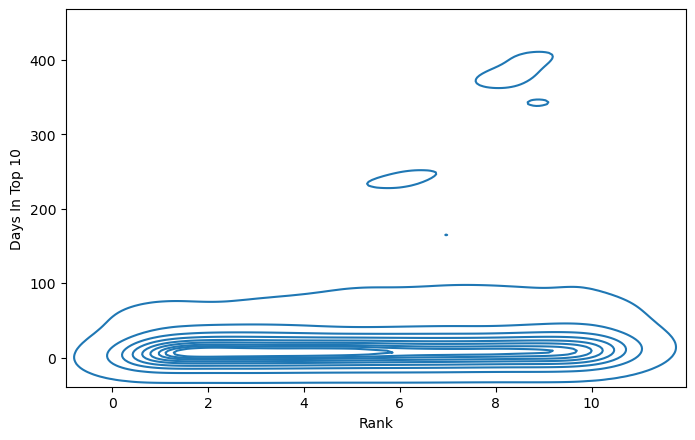

In [16]:
plt.figure(figsize=(8,5),dpi=100)
sns.kdeplot(data=netflix_df,x=netflix_df['Rank'],y=netflix_df['Days In Top 10'])
#plt.legend(bbox_to_anchor=(1.05,1.05))
plt.show()

In [17]:
netflix_df[['Year to Date Rank','Viewership Score']].groupby('Year to Date Rank').count()

,Viewership Score
Year to Date Rank,
1,708
2,708
3,706
4,705
5,1558
6,675
7,633
8,554
9,481


<AxesSubplot:xlabel='Last Week Rank', ylabel='count'>

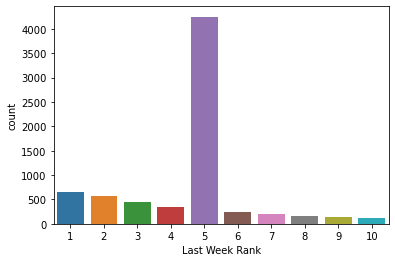

In [18]:
sns.countplot(x=netflix_df['Last Week Rank'])

<AxesSubplot:>

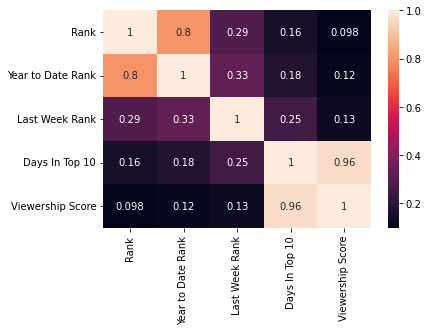

In [19]:
sns.heatmap(netflix_df.corr(),annot=True)

<AxesSubplot:xlabel='Days In Top 10', ylabel='Rank'>

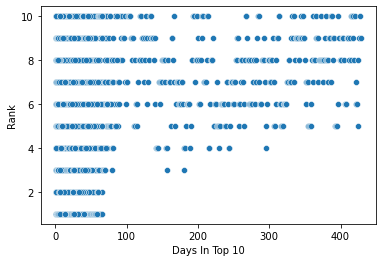

In [20]:
sns.scatterplot(data=netflix_df,x=netflix_df['Days In Top 10'],y=netflix_df['Rank'])

<AxesSubplot:xlabel='Rank', ylabel='Viewership Score'>

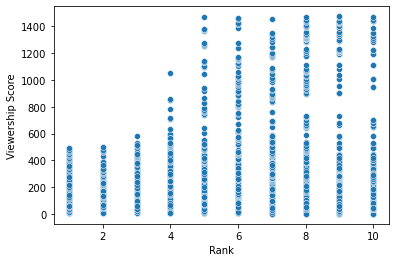

In [21]:
sns.scatterplot(data=tvshow,x=tvshow['Rank'],y=tvshow['Viewership Score'])


<AxesSubplot:>

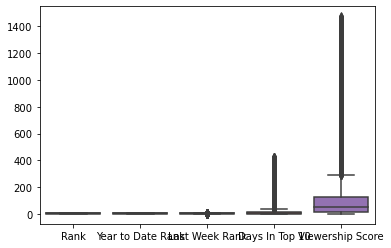

In [22]:
sns.boxplot(data=netflix_df)

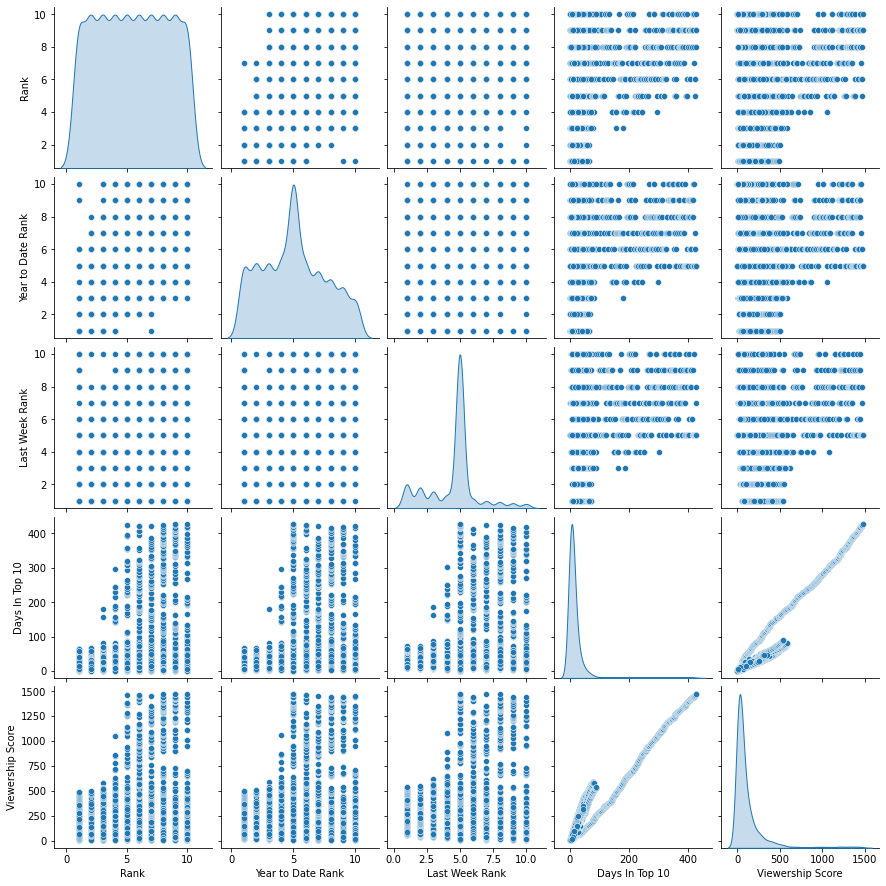

In [23]:
sns.pairplot(netflix_df,diag_kind='kde',dropna=True)

# Points

1. Datasets has much outlier
2. there is linear relationship betn 'Viewership Score' and 'Day in top 10' 
3. Most of the Feachers are normally distributed
4. we can say that having rank of Movie/Show greter than 5 is recommended as per datasets datapoints.

In [24]:
netflix_df.describe()

,Rank,Year to Date Rank,Last Week Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000
mean,5.500000,5.044225,4.531690,24.123662,122.790141
std,2.872484,2.556699,1.821514,58.473789,213.861642
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,4.000000,3.000000,19.000000
50%,5.500000,5.000000,5.000000,7.000000,50.000000
75%,8.000000,7.000000,5.000000,18.000000,128.000000
max,10.000000,10.000000,10.000000,428.000000,1474.000000


# 2. Starbucks Analysis

In [25]:
starbucks=pd.read_csv("starbucks_drinkMenu_expanded.csv")
starbucks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [26]:
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

## #check duplicate records and drop

In [27]:
starbucks.duplicated().sum()
starbucks.drop_duplicates(inplace=True)

## #check null values and drop or fill

In [28]:
starbucks.isna().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [29]:
starbucks.dropna(inplace=True)

In [30]:
starbucks.shape

(241, 18)

In [31]:
starbucks.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

## #Rename Some Columns

In [32]:
starbucks.rename(columns={' Total Fat (g)':'Total_Fat','Trans Fat (g) ':'Trans_Fat', 'Saturated Fat (g)':'Saturated_Fat', ' Sodium (mg)':'Sodium',
       ' Total Carbohydrates (g) ':'Total_Carbohydrates', 'Cholesterol (mg)':'Cholesterol', ' Dietary Fibre (g)':'Dietary_Fibre',
       ' Sugars (g)':'Sugars', ' Protein (g) ':'Protein','Vitamin A (% DV) ':'Vitamin A(% DV)', 'Vitamin C (% DV)':'Vitamin C(% DV)',
       ' Calcium (% DV) ':'Calcium (% DV)', 'Iron (% DV) ':'Iron (% DV)', 'Caffeine (mg)':'Caffeine(mg)'},inplace=True)

In [33]:
starbucks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total_Fat,Trans_Fat,Saturated_Fat,Sodium,Total_Carbohydrates,Cholesterol,Dietary_Fibre,Sugars,Protein,Vitamin A(% DV),Vitamin C(% DV),Calcium (% DV),Iron (% DV),Caffeine(mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


## #Remove Unwanted Char from Datasets

In [34]:
columns=['Vitamin A(% DV)','Vitamin C(% DV)','Calcium (% DV)','Iron (% DV)']
starbucks[columns]=starbucks[columns].replace('%','',regex=True)
starbucks[columns]=starbucks[columns].astype(float).apply(lambda a: a/100)


In [35]:
starbucks[starbucks['Caffeine(mg)']=='Varies'].count()

Beverage_category      10
Beverage               10
Beverage_prep          10
Calories               10
Total_Fat              10
Trans_Fat              10
Saturated_Fat          10
Sodium                 10
Total_Carbohydrates    10
Cholesterol            10
Dietary_Fibre          10
Sugars                 10
Protein                10
Vitamin A(% DV)        10
Vitamin C(% DV)        10
Calcium (% DV)         10
Iron (% DV)            10
Caffeine(mg)           10
dtype: int64

In [36]:
starbucks['Caffeine(mg)']=starbucks['Caffeine(mg)'].replace(['varies','Varies'],np.nan).astype(float)

In [37]:
starbucks['Caffeine(mg)'].unique()

array([175., 260., 330., 410.,  75., 150.,  85.,  95., 180., 225., 300.,
        10.,  20.,  25.,  30.,   0.,  nan,  50.,  70., 120.,  55.,  80.,
       110., 165., 235.,  90., 125., 170.,  15., 130., 140., 100., 145.,
        65., 105.])

In [38]:
starbucks['Calories'].unique()


array([  3,   4,   5,  70, 100, 150, 110, 130, 190, 170, 240, 200, 180,
       220, 260, 230, 280, 340, 290, 160, 250, 210, 320, 270,  10,  15,
        25,  50,  80,  60,  90, 120, 140, 300, 310, 350, 400, 370, 450,
       510, 460, 380, 330, 360,   0, 390, 420, 430], dtype=int64)

In [39]:
starbucks['Total_Carbohydrates'].unique()

array([  5,  10,  75,  85,  65, 120, 135, 105, 150, 170, 130, 190, 220,
        60,  70,  55, 100, 115, 125, 140, 160, 180,  80, 110,  95, 200,
        15,  40,  90,   0,   1, 240, 250, 310, 330, 290,  20,  25,  50,
        45, 230,   4,  30,  35, 210, 300, 340, 270, 280, 320, 260],
      dtype=int64)

In [40]:
starbucks['Total_Fat'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [42]:
starbucks['Trans_Fat'].unique()

array([0. , 0.1, 2. , 0.4, 0.2, 3. , 0.5, 3.5, 0.3, 4.5, 1. , 1.5, 6. ,
       2.5, 7. , 5. , 9. , 4. ])

In [43]:
starbucks['Saturated_Fat'].unique()

array([0. , 0.1, 0.2, 0.3])

In [44]:
starbucks['Sodium'].unique()

array([ 0,  5, 15, 25, 30, 10, 35, 20, 40], dtype=int64)

## #Data Visualisation

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
starbucks.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total_Fat', 'Trans_Fat', 'Saturated_Fat', 'Sodium',
       'Total_Carbohydrates', 'Cholesterol', 'Dietary_Fibre', 'Sugars',
       'Protein', 'Vitamin A(% DV)', 'Vitamin C(% DV)', 'Calcium (% DV)',
       'Iron (% DV)', 'Caffeine(mg)'],
      dtype='object')

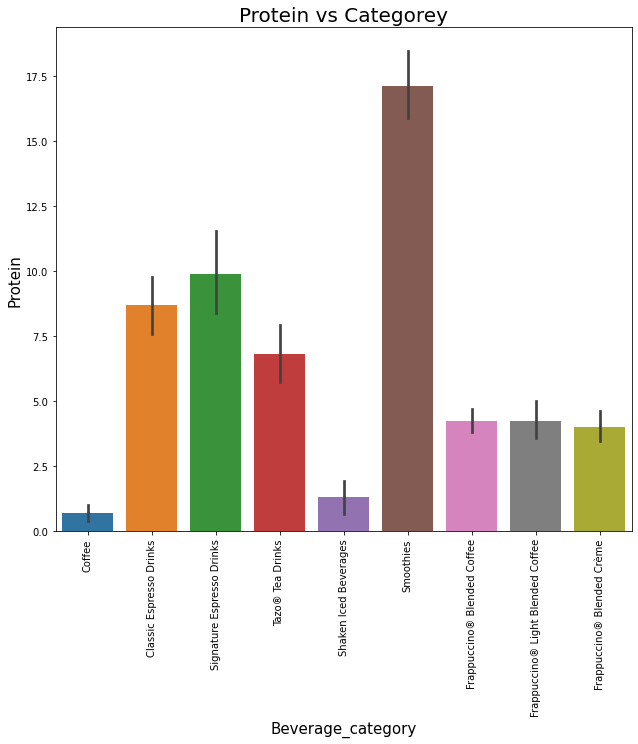

In [47]:
fig=plt.figure(figsize=(8,7))
axes=fig.add_axes([0,0,1,1])
sns.barplot(data=starbucks,y="Protein",x='Beverage_category')
axes.set_title('Protein vs Categorey',size=20)
axes.set_xlabel("Beverage_category",size=15)
axes.set_ylabel("Protein",size=15)
plt.xticks(rotation=90)
plt.show()

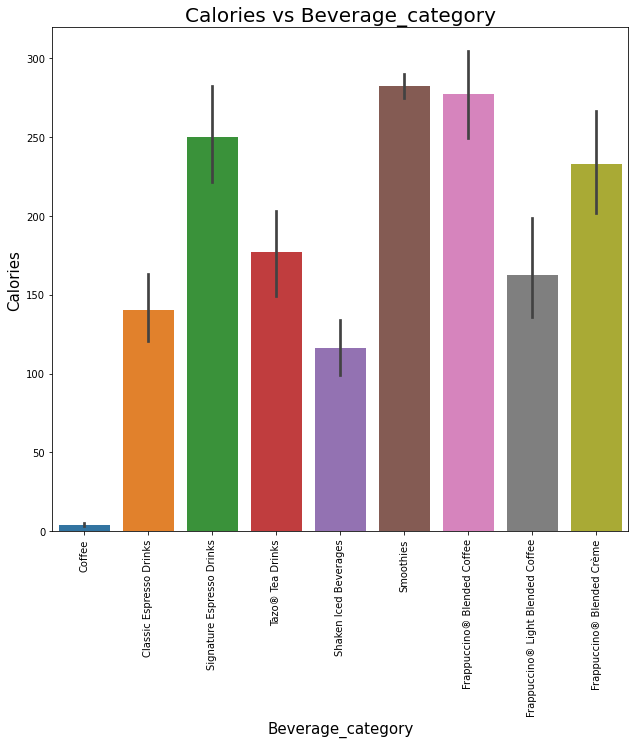

In [48]:
fig=plt.figure(figsize=(8,7))
axes=fig.add_axes([0,0,1,1])
sns.barplot(data=starbucks,y="Calories",x='Beverage_category')
axes.set_title('Calories vs Beverage_category',size=20)
axes.set_xlabel("Beverage_category",size=15)
axes.set_ylabel("Calories",size=15)
plt.xticks(rotation=90)
plt.show()

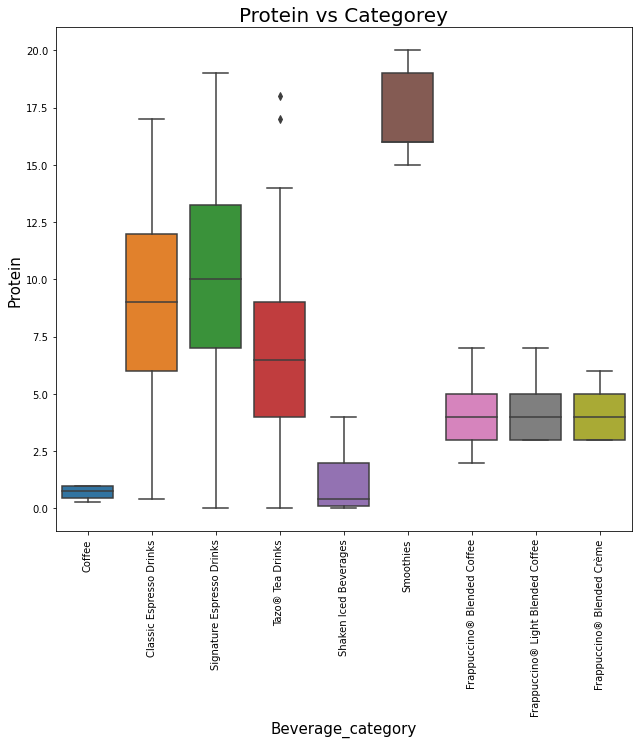

In [49]:
fig=plt.figure(figsize=(8,7))
axes=fig.add_axes([0,0,1,1])
sns.boxplot(data=starbucks,y="Protein",x='Beverage_category')
axes.set_title('Protein vs Categorey',size=20)
axes.set_xlabel("Beverage_category",size=15)
axes.set_ylabel("Protein",size=15)
plt.xticks(rotation=90)
plt.show()

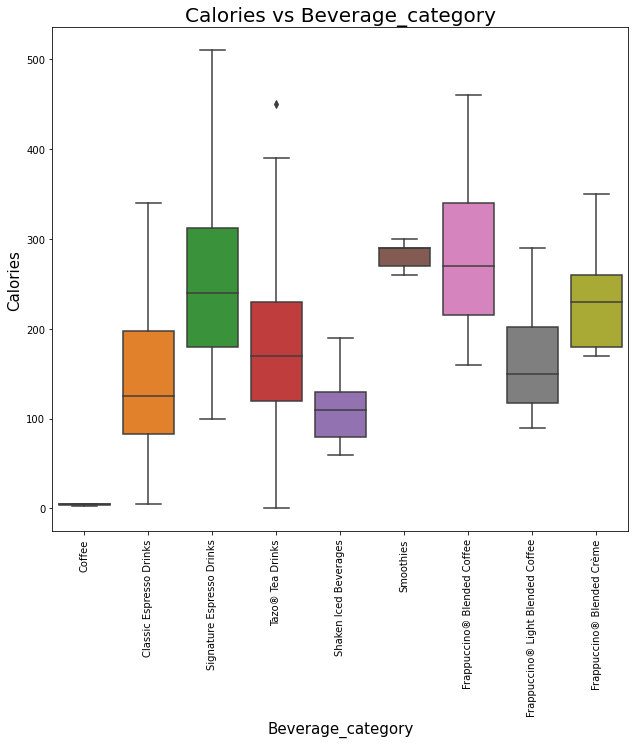

In [50]:
fig=plt.figure(figsize=(8,7))
axes=fig.add_axes([0,0,1,1])
sns.boxplot(data=starbucks,y="Calories",x='Beverage_category')
axes.set_title('Calories vs Beverage_category',size=20)
axes.set_xlabel("Beverage_category",size=15)
axes.set_ylabel("Calories",size=15)
plt.xticks(rotation=90)
plt.show()

In [51]:
starbucks.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total_Fat', 'Trans_Fat', 'Saturated_Fat', 'Sodium',
       'Total_Carbohydrates', 'Cholesterol', 'Dietary_Fibre', 'Sugars',
       'Protein', 'Vitamin A(% DV)', 'Vitamin C(% DV)', 'Calcium (% DV)',
       'Iron (% DV)', 'Caffeine(mg)'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


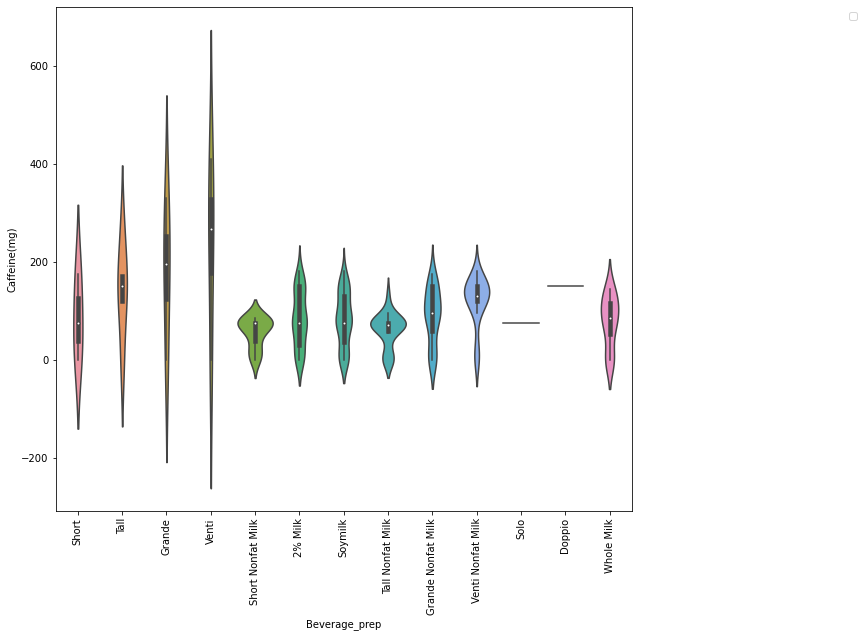

In [52]:
fig=plt.figure(figsize=(8,7))
axes=fig.add_axes([0,0,1,1])
sns.violinplot(data=starbucks,x='Beverage_prep',y='Caffeine(mg)')
#axes.set_title('Count of Beverage_prep',size=20)
#axes.set_xlabel("Beverage_category",size=15)
#axes.set_ylabel("Calories",size=15)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.4,1))
plt.show()

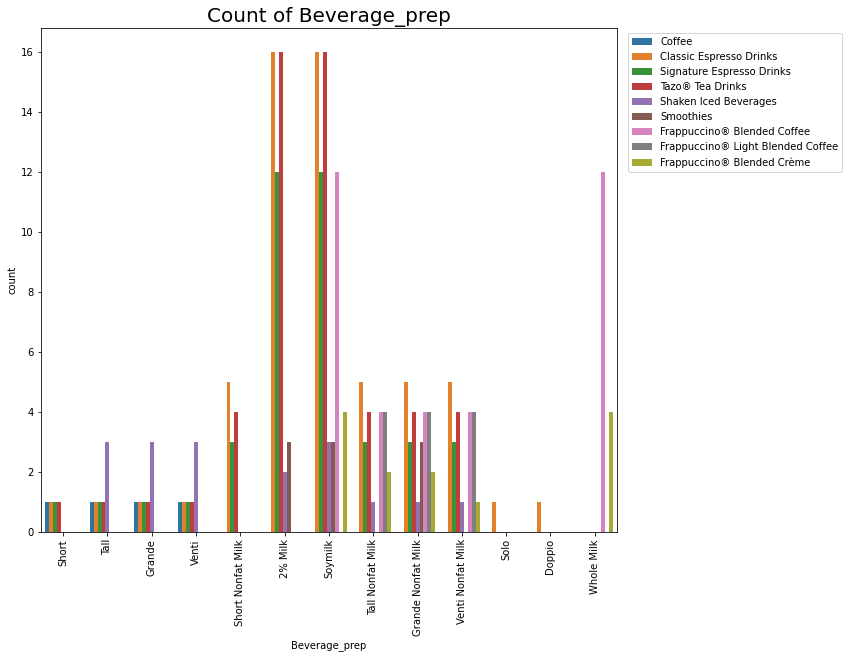

In [53]:
fig=plt.figure(figsize=(8,7))
axes=fig.add_axes([0,0,1,1])
sns.countplot(data=starbucks,x='Beverage_prep',hue='Beverage_category')
axes.set_title('Count of Beverage_prep',size=20)
#axes.set_xlabel("Beverage_category",size=15)
#axes.set_ylabel("Calories",size=15)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.4,1))
plt.show()

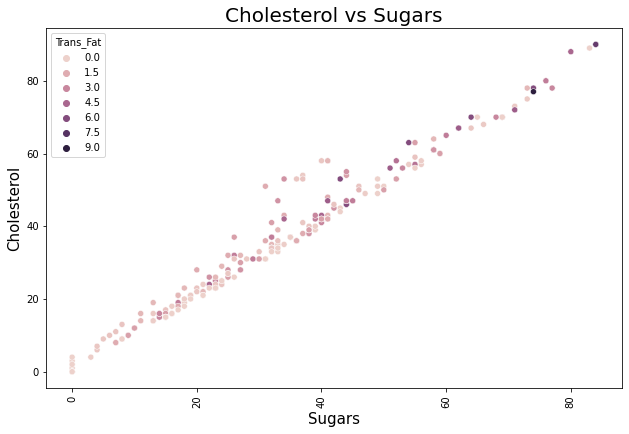

In [54]:
fig=plt.figure(figsize=(8,5))
axes=fig.add_axes([0,0,1,1])
sns.scatterplot(data=starbucks,y="Cholesterol",x="Sugars",hue='Trans_Fat')
axes.set_title('Cholesterol vs Sugars',size=20)
axes.set_xlabel("Sugars",size=15)
axes.set_ylabel("Cholesterol",size=15)
plt.xticks(rotation=90)
plt.show()

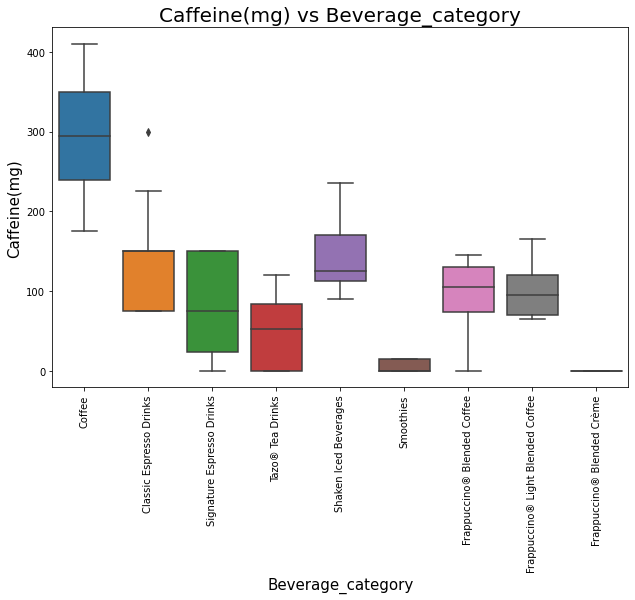

In [55]:
fig=plt.figure(figsize=(8,5))
axes=fig.add_axes([0,0,1,1])
sns.boxplot(data=starbucks,x="Beverage_category",y="Caffeine(mg)")
axes.set_title('Caffeine(mg) vs Beverage_category',size=20)
axes.set_xlabel("Beverage_category",size=15)
axes.set_ylabel("Caffeine(mg)",size=15)
plt.xticks(rotation=90)
plt.show()

# #HeatMap

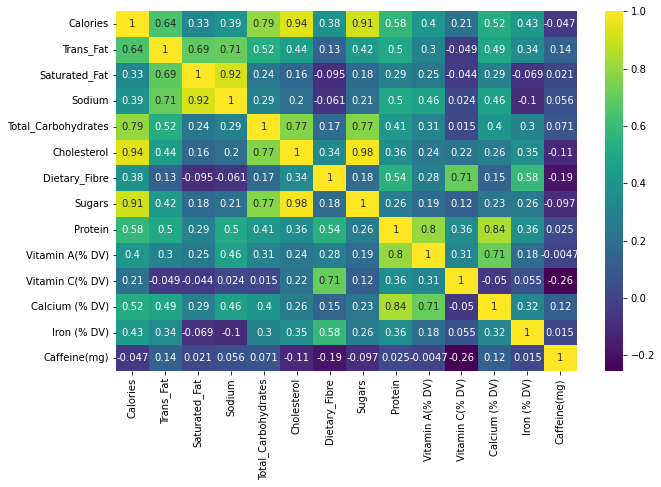

In [56]:
fig=plt.figure(figsize=(8,5))
axes=fig.add_axes([0,0,1,1])
sns.heatmap(data=starbucks.corr(),annot=True,cmap='viridis')
#axes.set_title('Caffeine(mg) vs Beverage_category',size=20)
#axes.set_xlabel("Beverage_category",size=15)
#axes.set_ylabel("Caffeine(mg)",size=15)
plt.xticks(rotation=90)
plt.show()

## #starbucks-menu-nutrition-drinks

In [57]:
stardrinks=pd.read_csv("starbucks-menu-nutrition-drinks.csv")
stardrinks.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [58]:
stardrinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  177 non-null    object
 1   Calories    177 non-null    object
 2   Fat (g)     177 non-null    object
 3   Carb. (g)   177 non-null    object
 4   Fiber (g)   177 non-null    object
 5   Protein     177 non-null    object
 6   Sodium      177 non-null    object
dtypes: object(7)
memory usage: 9.8+ KB


## #Rename the Columns.

In [69]:
stardrinks.rename(columns={'Unnamed: 0':'Drink_Names',' Calories':'Calories', ' Fat (g)':'Fat(g)', ' Carb. (g)':'Carb(g)', ' Fiber (g)':'Fiber(g)',
       ' Protein (g)':'Protein(g)'},inplace=True)

In [70]:
stardrinks.columns

Index(['Drink_Names', 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)',
       'Protein', 'Sodium'],
      dtype='object')

In [77]:
stardrinks['Carb. (g)'].unique()

array(['11', '-', '18', '14', '28', '0', '21', '23', '19', '15', '38',
       '35', '37', '17', '31', '8', '24', '27', '33', '34', '13', '2',
       '5', '47', '45', '42', '12', '40', '32', '36', '30', '53', '64',
       '60'], dtype=object)

In [74]:
stardrinks['Fiber (g)'].unique()

array(['0', '-', '1', '2', '4', '5', '8', '7'], dtype=object)

In [75]:
stardrinks['Protein'].unique()

array(['0', '-', '5', '20', '1', '14', '12', '13', '8', '10', '11', '9',
       '7', '3', '15', '4', '16'], dtype=object)

In [76]:
stardrinks['Sodium'].unique()

array(['10', '-', '5', '0', '65', '90', '15', '115', '120', '20', '25',
       '160', '170', '140', '100', '150', '180', '95', '190', '40', '240',
       '200', '220', '135', '130'], dtype=object)

In [73]:
stardrinks['Fat (g)'].unique()

array(['0', '-', '2.5', '5', '6', '9', '26', '7', '8', '4', '4.5', '1',
       '11', '0.5', '2'], dtype=object)

In [72]:
stardrinks['Calories'].unique()

array(['45', '-', '80', '60', '110', '0', '130', '140', '150', '70',
       '120', '30', '90', '210', '200', '50', '10', '5', '320', '430',
       '190', '290', '250', '260', '180', '230', '300', '360', '350',
       '280'], dtype=object)

In [71]:
stardrinks['Drink_Names'].unique()

array(['Cool Lime Starbucks Refreshers™ Beverage', 'Ombré Pink Drink',
       'Pink Drink', 'Strawberry Acai Starbucks Refreshers™ Beverage',
       'Very Berry Hibiscus Starbucks Refreshers™ Beverage',
       'Violet Drink', 'Evolution Fresh™ Cold-Pressed Apple Berry Juice',
       'Evolution Fresh™ Defense Up',
       'Evolution Fresh™ Organic Ginger Limeade', 'Iced Coffee',
       'Iced Coffee with Milk', 'Iced Espresso Classics - Vanilla Latte',
       'Iced Espresso Classics - Caffe Mocha',
       'Iced Espresso Classics - Caramel Macchiato',
       'Starbucks® Caramel Iced Coffee', 'Starbucks® Iced Coffee + Milk',
       'Starbucks® Low Calorie Iced Coffee + Milk',
       'Starbucks® Vanilla Iced Coffee', 'Shaken Sweet Tea',
       'Tazo® Bottled Berry Blossom White', 'Tazo® Bottled Black Mango',
       'Tazo® Bottled Black with Lemon', 'Tazo® Bottled Brambleberry',
       'Tazo® Bottled Giant Peach', 'Tazo® Bottled Iced Passion',
       'Tazo® Bottled Lemon Ginger',
       'Tazo

## #Data Cleaning

In [96]:
column=['Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)',
       'Protein', 'Sodium']

#Calories
stardrinks['Calories']=stardrinks['Calories'].astype(float)
stardrinks['Calories']=stardrinks['Calories'].replace(np.nan,np.mean(stardrinks['Calories']))
#Fat (g)
stardrinks['Fat (g)']=stardrinks['Fat (g)'].astype(float)
stardrinks['Fat (g)']=stardrinks['Fat (g)'].replace(np.nan,np.mean(stardrinks['Fat (g)']))

#Carb. (g)
stardrinks['Carb. (g)']=stardrinks['Carb. (g)'].astype(float)
stardrinks['Carb. (g)']=stardrinks['Carb. (g)'].replace(np.nan,np.mean(stardrinks['Carb. (g)']))

#Fiber (g)
stardrinks['Fiber (g)']=stardrinks['Fiber (g)'].astype(float)
stardrinks['Fiber (g)']=stardrinks['Fiber (g)'].replace(np.nan,np.mean(stardrinks['Fiber (g)']))

#Protein
stardrinks['Protein']=stardrinks['Protein'].astype(float)
stardrinks['Protein']=stardrinks['Protein'].replace(np.nan,np.mean(stardrinks['Protein']))

#Sodium
stardrinks['Sodium']=stardrinks['Sodium'].astype(float)
stardrinks['Sodium']=stardrinks['Sodium'].replace(np.nan,np.mean(stardrinks['Sodium']))

In [97]:
stardrinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Drink_Names  177 non-null    object 
 1   Calories     177 non-null    float64
 2   Fat (g)      177 non-null    float64
 3   Carb. (g)    177 non-null    float64
 4   Fiber (g)    177 non-null    float64
 5   Protein      177 non-null    float64
 6   Sodium       177 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.8+ KB


In [102]:
stardrinks.isna().sum()

Drink_Names    0
Calories       0
Fat (g)        0
Carb. (g)      0
Fiber (g)      0
Protein        0
Sodium         0
dtype: int64

## Data Analysis using Matplotlib and Seaborn

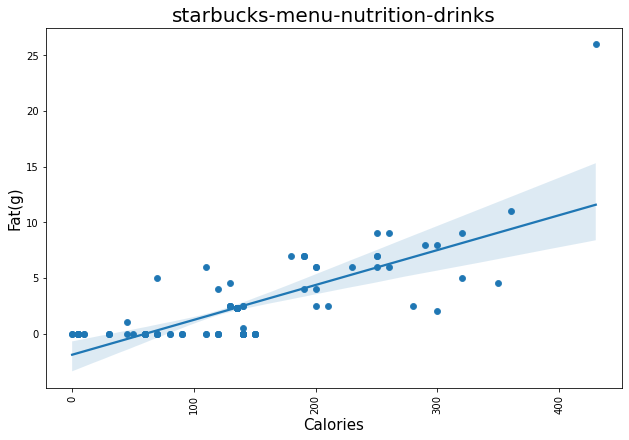

In [110]:
fig=plt.figure(figsize=(8,5))
axes=fig.add_axes([0,0,1,1])
sns.scatterplot(data=stardrinks,x='Calories',y='Fat (g)')
sns.regplot(data=stardrinks,x='Calories',y='Fat (g)')
axes.set_title('starbucks-menu-nutrition-drinks',size=20)
axes.set_xlabel("Calories",size=15)
axes.set_ylabel("Fat(g)",size=15)
plt.xticks(rotation=90)
plt.show()

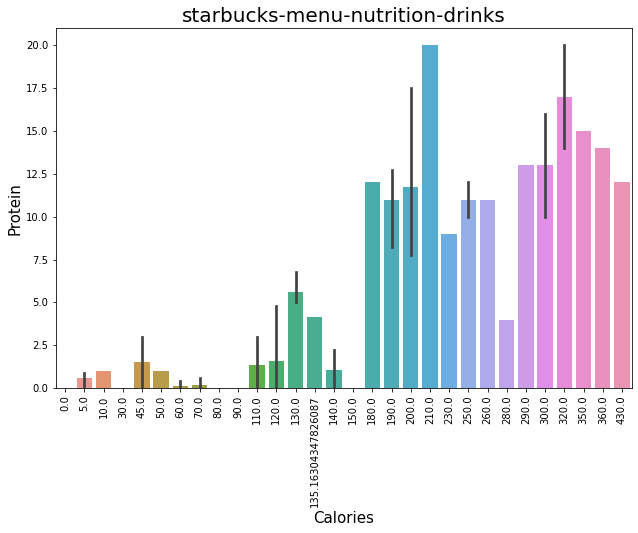

In [115]:
fig=plt.figure(figsize=(8,5))
axes=fig.add_axes([0,0,1,1])
sns.barplot(data=stardrinks,x='Calories',y='Protein')
#sns.regplot(data=stardrinks,x='Calories',y='Fat (g)')
axes.set_title('starbucks-menu-nutrition-drinks',size=20)
axes.set_xlabel("Calories",size=15)
axes.set_ylabel("Protein",size=15)
plt.xticks(rotation=90)
plt.show()

## #Heapmap

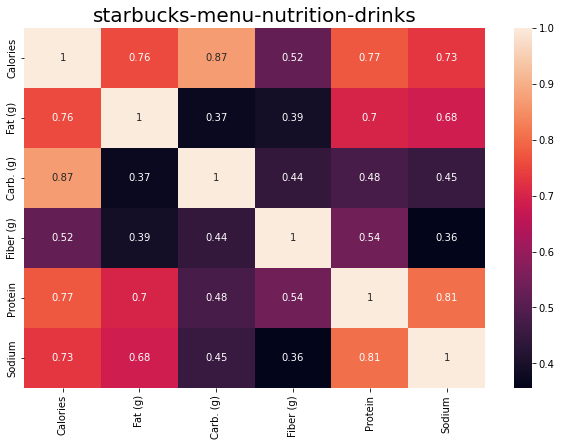

In [117]:
fig=plt.figure(figsize=(8,5))
axes=fig.add_axes([0,0,1,1])
sns.heatmap(data=stardrinks.corr(),annot=True)
#sns.regplot(data=stardrinks,x='Calories',y='Fat (g)')
axes.set_title('starbucks-menu-nutrition-drinks',size=20)
#axes.set_xlabel("Calories",size=15)
#axes.set_ylabel("Protein",size=15)
plt.xticks(rotation=90)
plt.show()

## #Pairplot

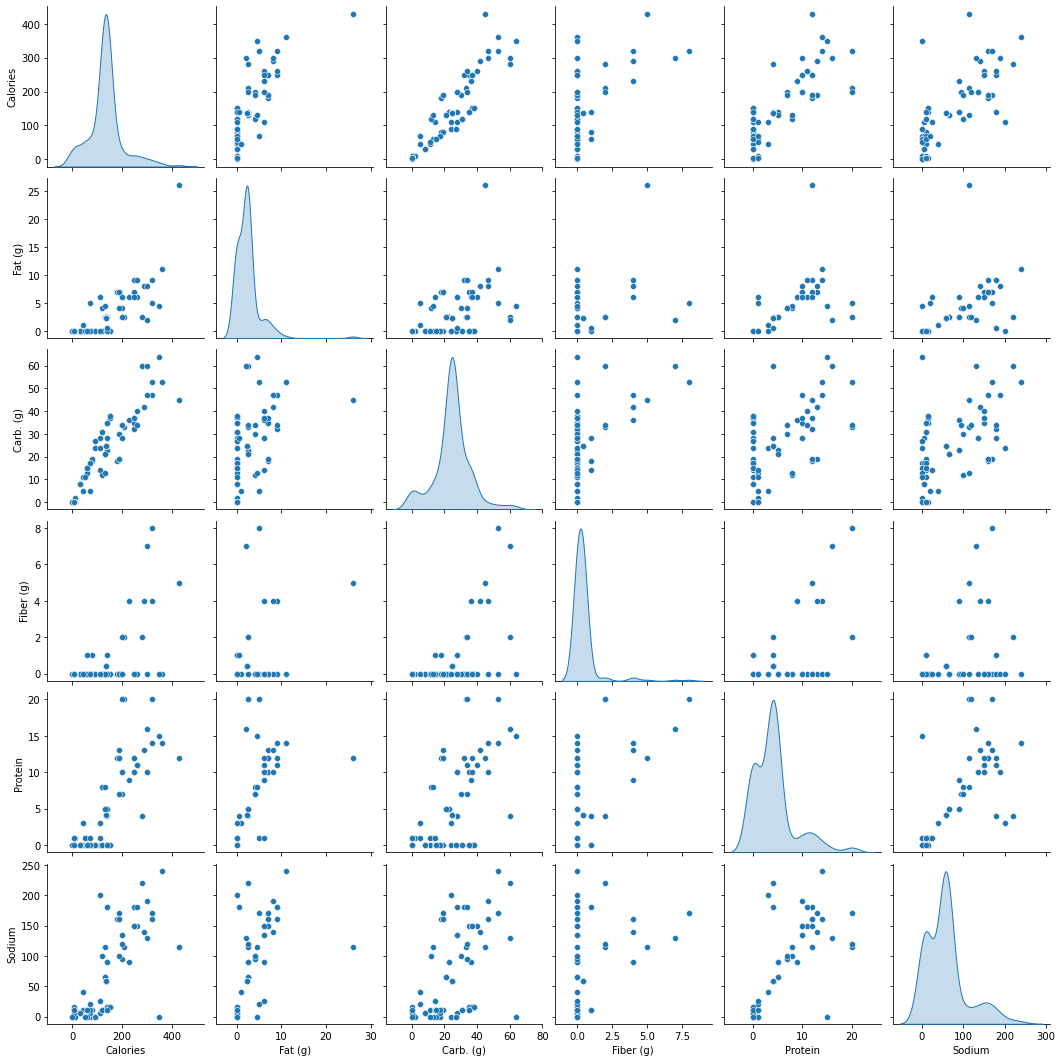

In [130]:

#axes=fig.add_axes([0,0,1,1])

sns.pairplot(data=stardrinks,diag_kind='kde')
#sns.regplot(data=stardrinks,x='Calories',y='Fat (g)')
#axes.set_xlabel("Calories",size=15)
#axes.set_ylabel("Protein",size=15)


## #starbucks-menu-nutrition-food

In [131]:
starfood=pd.read_csv("starbucks-menu-nutrition-food.csv",encoding='utf-16')
starfood.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


In [132]:
starfood.columns

Index(['Unnamed: 0', ' Calories', ' Fat (g)', ' Carb. (g)', ' Fiber (g)',
       ' Protein (g)'],
      dtype='object')

## Rename Columns

In [141]:
starfood.rename(columns={'Unnamed: 0':'Food_Menu',' Calories':'Calories', ' Fat (g)':'Fat(g)', ' Carb. (g)':'Carb(g)', ' Fiber (g)':'Fiber(g)',
       ' Protein (g)':'Protein(g)'},inplace=True)

In [142]:
starfood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Food_Menu   113 non-null    object 
 1   Calories    113 non-null    int64  
 2   Fat(g)      113 non-null    float64
 3   Carb(g)     113 non-null    int64  
 4   Fiber(g)    113 non-null    int64  
 5   Protein(g)  113 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.4+ KB


In [136]:
starfood['Fat(g)'].unique()

array([ 5. ,  6. , 22. , 23. , 16. , 17. , 12. , 15. , 21. , 18. , 24. ,
        1. , 28. ,  3.5,  3. ,  8. , 14. , 20. , 10. ,  4. , 27. ,  4.5,
        1.5,  9. , 13. , 25. , 29. , 37. ,  7. , 26. , 32. , 19. ,  2.5,
       30. ,  0. ])

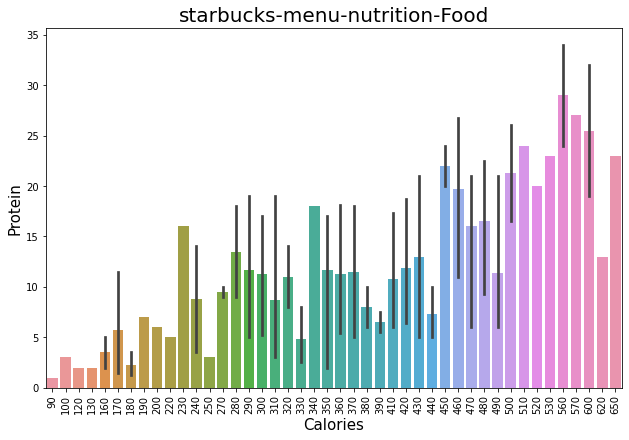

In [145]:
fig=plt.figure(figsize=(8,5))
axes=fig.add_axes([0,0,1,1])
sns.barplot(data=starfood,x='Calories',y='Protein(g)')
#sns.regplot(data=stardrinks,x='Calories',y='Fat (g)')
axes.set_title('starbucks-menu-nutrition-Food',size=20)
axes.set_xlabel("Calories",size=15)
axes.set_ylabel("Protein",size=15)
plt.xticks(rotation=90)
plt.show()

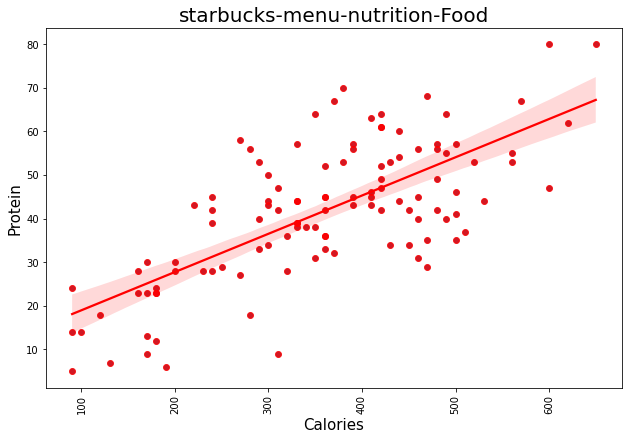

In [156]:
fig=plt.figure(figsize=(8,5))
axes=fig.add_axes([0,0,1,1])
sns.scatterplot(data=starfood,x='Calories',y='Carb(g)')
sns.regplot(data=starfood,x='Calories',y='Carb(g)',color='red')
axes.set_title('starbucks-menu-nutrition-Food',size=20)
axes.set_xlabel("Calories",size=15)
axes.set_ylabel("Protein",size=15)
plt.xticks(rotation=90)
plt.show()

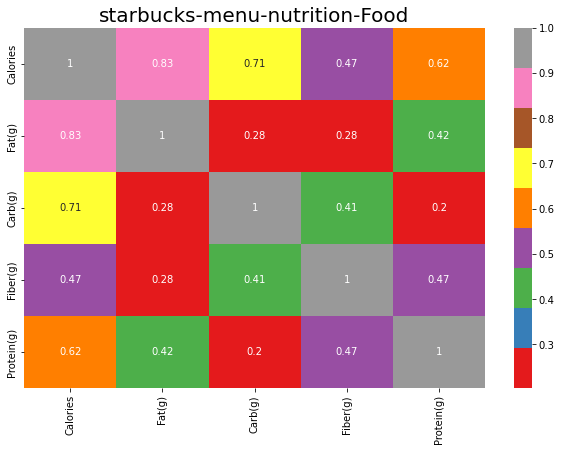

In [159]:
fig=plt.figure(figsize=(8,5))
axes=fig.add_axes([0,0,1,1])
sns.heatmap(data=starfood.corr(),annot=True,cmap='Set1')
#sns.regplot(data=stardrinks,x='Calories',y='Fat (g)')
axes.set_title('starbucks-menu-nutrition-Food',size=20)
#axes.set_xlabel("Calories",size=15)
#axes.set_ylabel("Protein",size=15)
plt.xticks(rotation=90)
plt.show()